#  Requirements

In [1]:
import requests
import numpy as np
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import io

In [2]:
# global parameters for plots
plt.style.use("fast")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".eps")
    fig.savefig("../figures/" + fig_name + ".png")
    s.write_file(figpath + fig_name + ".eps", fig)
    s.write_file(figpath + fig_name + ".png", fig)

# Roman Cities - Hanson (from online CSV) - merging


In [2]:
### ROMAN CITIES AS A DATAFRAME
url = "http://oxrep.classics.ox.ac.uk/oxrep/docs/Hanson2016/Hanson2016_Cities_OxREP.csv"
response = requests.get(url).text
file_object = io.StringIO(response)
cities_raw = pd.read_csv(file_object)
cities_raw.head(3) 

,Primary Key,Ancient Toponym,Modern Toponym,Province,Country,Barrington Atlas Rank,Barrington Atlas Reference,Start Date,End Date,Longitude (X),Latitude (Y),Select Bibliography
0,Hanson2016_1,Abae,Kalapodi,Achaea,Greece,4 or 5,55 D3,-600,NaN,22.933333,38.583333,BNP; Hansen 2006; Hansen and Nielsen 2004; PEC...
1,Hanson2016_2,Acharnae,Acharnes,Achaea,Greece,3,59 B2,-600,NaN,23.734088,38.083473,BNP; DGRG; PECS; Sear 2006.
2,Hanson2016_3,Acraephia,Akraifnio,Achaea,Greece,3,55 E4,-600,NaN,23.219702,38.452606,BNP; DGRG; Hansen and Nielsen 2004; PECS; Sear...


In [3]:
cities_area = pd.read_csv(io.StringIO(requests.get("http://oxrep.classics.ox.ac.uk/oxrep/docs/Hanson2016/Hanson2016_Areas_OxREP.csv").text))
cities_area.head(3)

,Primary Key,Area,Estimate Basis
0,Hanson2016_1,16,Walls
1,Hanson2016_4,52,Inhabited area
2,Hanson2016_7,130,Walls


In [4]:
len(cities_area)

885

In [5]:
cities_status_raw = pd.read_csv(io.StringIO(requests.get("http://oxrep.classics.ox.ac.uk/oxrep/docs/Hanson2016/Hanson2016_Civic%20Status_OxREP.csv").text))
cities_status_raw.head(3)

,Primary Key,Civic Status,Notes
0,Hanson2016_1,Rights and privileges,libera
1,Hanson2016_4,Rights and privileges,libera
2,Hanson2016_8,Rights and privileges,libera et immunis


In [6]:
cities_status = pd.DataFrame(cities_status_raw.groupby("Primary Key")["Civic Status"].apply(list))
cities_status.head(5)

,Civic Status
Primary Key,
Hanson2016_1,[Rights and privileges]
Hanson2016_1000,[Municipium]
Hanson2016_1001,[Municipium]
Hanson2016_1002,"[Colonia, Municipium]"
Hanson2016_1003,[Municipium]


In [7]:
cities_monuments_raw = pd.read_csv(io.StringIO(requests.get("http://oxrep.classics.ox.ac.uk/oxrep/docs/Hanson2016/Hanson2016_Monuments_OxREP.csv").text))
cities_monuments_raw.head(3)

,Primary Key,Structure
0,Hanson2016_1,Acropolis
1,Hanson2016_1,Agora
2,Hanson2016_1,Temple of Apollo


In [8]:
print(len(cities_monuments_raw))
cities_monuments = pd.DataFrame(cities_monuments_raw.groupby("Primary Key")["Structure"].apply(list))
print(len(cities_monuments))

9472
1208


In [9]:
cities_monuments

,Structure
Primary Key,
Hanson2016_,[Agora?]
Hanson2016_1,"[Acropolis, Agora, Temple of Apollo, Theatre, ..."
Hanson2016_10,"[Acropolis, Gymnasium, Sanctuary of Poseidon, ..."
Hanson2016_100,"[Acropolis, Fountain, Gymnasium, Gymnasium, Hi..."
Hanson2016_1000,[Temple]
...,...
Hanson2016_993,"[Amphitheatre, Basilica, Baths?, Forum, Temple..."
Hanson2016_995,"[Aqueduct, Baths, Forum, Unidentified public b..."
Hanson2016_996,"[Temple, Walls]"


In [10]:
cities = pd.merge(cities_raw, cities_area, on="Primary Key", how="left") 
cities = pd.merge(cities, cities_status, on="Primary Key", how="left")
cities = pd.merge(cities, cities_monuments, on="Primary Key", how="left")
len(cities)

1388

In [11]:
def get_number_of_structures(row):
  try: num = len(row["Structure"])
  except: num = 0
  return num
cities["num_of_structures"] = cities.apply(lambda row: get_number_of_structures(row), axis=1)

In [12]:
cities.to_csv("../data/hanson_2016_mergred.csv")

# To start with merged data

In [13]:
cities = pd.read_csv("../data/hanson_2016_mergred.csv")

In [14]:
### ROMAN CITIES AS A GEODATAFRAME
cities = gpd.GeoDataFrame(cities, geometry=gpd.points_from_xy(cities["Longitude (X)"], cities["Latitude (Y)"]))
cities.drop(columns=["Longitude (X)", "Latitude (Y)"], inplace=True)
cities.head(5)

,Unnamed: 0,Primary Key,Ancient Toponym,Modern Toponym,Province,Country,Barrington Atlas Rank,Barrington Atlas Reference,Start Date,End Date,Select Bibliography,Area,Estimate Basis,Civic Status,Structure,num_of_structures,geometry
0,0,Hanson2016_1,Abae,Kalapodi,Achaea,Greece,4 or 5,55 D3,-600,NaN,BNP; Hansen 2006; Hansen and Nielsen 2004; PEC...,16.0,Walls,['Rights and privileges'],"['Acropolis', 'Agora', 'Temple of Apollo', 'Th...",5,POINT (22.93333 38.58333)
1,1,Hanson2016_2,Acharnae,Acharnes,Achaea,Greece,3,59 B2,-600,NaN,BNP; DGRG; PECS; Sear 2006.,NaN,NaN,NaN,"['Sanctuary of Apollo Argyieus', 'Sanctuary of...",3,POINT (23.73409 38.08347)
2,2,Hanson2016_3,Acraephia,Akraifnio,Achaea,Greece,3,55 E4,-600,NaN,BNP; DGRG; Hansen and Nielsen 2004; PECS; Sear...,NaN,NaN,NaN,"['Acropolis', 'Agora', 'Fountain', 'Temple of ...",7,POINT (23.21970 38.45261)
3,3,Hanson2016_4,Aegina,Aigina,Achaea,Greece,2,59 A3,-600,NaN,BNP; DGRG; Hansen 2006; Hansen and Nielsen 200...,52.0,Inhabited area,['Rights and privileges'],"['Shrine of Aeacus', 'Stadium', 'Temple of Aph...",8,POINT (23.42850 37.75007)
4,4,Hanson2016_5,Aegira,Aigeira,Achaea,Greece,3,58 C1,-600,NaN,DGRG; Hansen and Nielsen 2004.,NaN,NaN,NaN,"['Acropolis', 'Agora', 'Gymnasium', 'Temple of...",8,POINT (22.35572 38.14795)


In [15]:
### the overall length of the dataset
len(cities)

1388

In [16]:
### number of cities with specified area
len(cities[cities["Area"].notnull()])

885

In [17]:
### number of cities with at least one monument
len(cities[cities["num_of_structures"]> 0])

1207

In [18]:
### number of cities with at least one monument & with specified area 
len(cities[(cities["num_of_structures"]> 0) & (cities["Area"].notnull())])

851

In [19]:
cities["Area"] = cities["Area"].astype(float)

In [20]:
### generate an ID (to be used for future merge)
cities["ID"] = cities.apply(lambda row: row["Primary Key"].partition("_")[2], axis=1)
cities.head(3)

,Unnamed: 0,Primary Key,Ancient Toponym,Modern Toponym,Province,Country,Barrington Atlas Rank,Barrington Atlas Reference,Start Date,End Date,Select Bibliography,Area,Estimate Basis,Civic Status,Structure,num_of_structures,geometry,ID
0,0,Hanson2016_1,Abae,Kalapodi,Achaea,Greece,4 or 5,55 D3,-600,NaN,BNP; Hansen 2006; Hansen and Nielsen 2004; PEC...,16.0,Walls,['Rights and privileges'],"['Acropolis', 'Agora', 'Temple of Apollo', 'Th...",5,POINT (22.93333 38.58333),1
1,1,Hanson2016_2,Acharnae,Acharnes,Achaea,Greece,3,59 B2,-600,NaN,BNP; DGRG; PECS; Sear 2006.,NaN,NaN,NaN,"['Sanctuary of Apollo Argyieus', 'Sanctuary of...",3,POINT (23.73409 38.08347),2
2,2,Hanson2016_3,Acraephia,Akraifnio,Achaea,Greece,3,55 E4,-600,NaN,BNP; DGRG; Hansen and Nielsen 2004; PECS; Sear...,NaN,NaN,NaN,"['Acropolis', 'Agora', 'Fountain', 'Temple of ...",7,POINT (23.21970 38.45261),3


# Population sizes from Hanson 2019

In [21]:
hanson2019 = pd.read_csv("../data/HansonOrtmanetal2019_dataset.csv")

In [22]:
hanson2019.reset_index(inplace=True)
hanson2019.head(5)

,level_0,Unnamed: 0,index,ID,Name,Area (ha),Population,Forum/agoraarea(m2),Streetarea(m2),Streetlength(m),Streetwidth(m),Blockarea(m2)
0,0,0,0,14,Athenae,225,58114,25967.0,NaN,NaN,NaN,NaN
1,1,1,1,19,Cassope,18,1989,NaN,27335.0,4522.0,7.0,9996.0
2,2,2,2,26,Corinthia,241,63700,15905.0,NaN,NaN,NaN,NaN
3,3,3,3,110,Alexandria,972,410535,75000.0,1072216.0,58399.0,21.0,140509.0
4,4,4,4,172,Carthago,343,102170,15000.0,NaN,NaN,NaN,NaN


In [23]:
len(hanson2019)

125

In [24]:
### total urban population
hanson2019["Population"].sum()

3039375

In [25]:
### clean the "IDs"
hanson2019["ID"] = hanson2019["ID"].astype(str).str.replace(" ", "")

In [26]:
cities_pop = pd.merge(cities, hanson2019, on="ID", how="left")

# Fitting the model for estimating population sizes.

There is an equation to calculate population sizes of ancient cities. It is as 
follows:

(1) <i> N = dA<sup>p</sup>  </i>,

where *N* is size of the estimated population, *d* is base coefficient for inhabitants per area, *A* is size of the area in hectares, and exponent *p* makes the hard work of modifying the density per area.

Thus, once we have area size for 885 Roman cities, to estimate their population sizes we just have to have right values for the coefficient *d* and the exponent *p*. And this is exactly what has been produced by Hanson & Ortman in their 2017 article by fitting a model against a diverse sample of Greco-Roman cities for which we have more robust population estimates based on other methods.





In their article, Hanson and Ortman offer the following values for *p* and *d*. 

*p* = 1.34

*d* = 41.84

Using these values, we are able to obtain approximately the same values for population sizes as the ones they publish in the supplementary data to their 2019 article.

In [27]:
### hanson&ortman2019 sample population data:
yd = cities_pop[cities_pop["Population"]>0]["Population"].values
print(list(yd))

[58114.0, 1989.0, 63700.0, 410535.0, 102170.0, 4837.0, 7037.0, 3085.0, 3085.0, 6034.0, 8633.0, 5975.0, 2655.0, 11979.0, 15580.0, 71587.0, 13870.0, 4653.0, 3085.0, 18882.0, 6567.0, 56053.0, 47672.0, 1030.0, 19404.0, 907.0, 7582.0, 23429.0, 6767.0, 7376.0, 17849.0, 9718.0, 8209.0, 5210.0, 6034.0, 36851.0, 6969.0, 9498.0, 1989.0, 17084.0, 15086.0, 33807.0, 4291.0, 3104.0, 4837.0, 16187.0, 7582.0, 4327.0, 38476.0, 28211.0, 46171.0, 40666.0, 9938.0, 6767.0, 3590.0, 7628.0, 4291.0, 41539.0, 17338.0, 6767.0, 13426.0, 14596.0, 6368.0, 5022.0, 6171.0, 2290.0, 1157.0, 7172.0, 9498.0, 9327.0, 2922.0, 1030.0, 12211.0, 7401.0, 15086.0, 35017.0, 9938.0, 6567.0, 2601.0, 3469.0, 2138.0, 6567.0, 4471.0, 26781.0, 4471.0, 5589.0, 3085.0, 7376.0, 2760.0, 923406.0, 5782.0, 9280.0, 7790.0, 907.0, 4916.0, 1718.0, 2290.0, 19667.0, 7790.0, 1062.0, 8209.0, 6567.0, 14841.0, 2828.0, 458.0, 5399.0, 10608.0, 2601.0, 5399.0, 3085.0, 29368.0, 7999.0, 70860.0, 1157.0, 3420.0, 4291.0, 7188.0, 9938.0, 7790.0, 53334.0, 3

In [28]:
### FIRST COARSE MODEL 

### estimates based on p=1.34 and d=41.84:
exp = 1.34 ### to avoid confusion with p values
dens = 41.84 ### to fit data including Rome, alternatively, try: 41.84 (best fitting density coeffecient for a smaple without Rome)
### area data: 
xd = cities_pop[cities_pop["Population"]>0]["Area"].values.round(4)
### estimate 
working_model = list(dens*(xd**exp).round())
print(working_model)

[59370.96000000001, 2008.3200000000002, 65103.04000000001, 421747.2, 104432.64000000001, 4895.280000000001, 7070.960000000001, 3138.0000000000005, 3138.0000000000005, 42383.920000000006, 8786.400000000001, 6066.8, 2635.92, 12175.44, 15857.36, 73178.16, 14100.080000000002, 4727.92, 3138.0000000000005, 19204.56, 6652.56, 57613.68000000001, 48659.920000000006, 1046.0, 19748.480000000003, 669.44, 7698.56, 23848.800000000003, 6861.76, 7489.360000000001, 18158.56, 9874.240000000002, 8326.16, 5271.84, 6066.8, 37614.16, 7070.960000000001, 9665.04, 2008.3200000000002, 17405.440000000002, 15355.28, 34476.16, 4351.360000000001, 3138.0000000000005, 4895.280000000001, 16359.44, 7698.56, 7489.360000000001, 39162.240000000005, 28744.08, 46986.32000000001, 41421.600000000006, 10083.44, 6861.76, 3640.0800000000004, 7698.56, 4351.360000000001, 42383.920000000006, 17656.480000000003, 15606.320000000002, 13639.840000000002, 14853.2, 6443.360000000001, 5104.4800000000005, 6276.000000000001, 460.24, 1171.52

In [29]:
from scipy.stats import pearsonr as corr
corr(working_model, yd)


(0.9986874516926364, 1.3078781126507134e-160)

Ok, it is quite good.  But it also somehow overestimates some values. Let's try find a better fitting model, perhaps just by including more decimal numbers.

Let's turn to least-squares.


In [30]:
RSS_list = []
exp_values = np.linspace(1.33,1.35, 10001)
for exp in exp_values: ### for each from 1001 values of exp (or: p) between 1.33 and 1.35:
  y_model = dens*(xd**exp) ## tune the model
  RSS = sum(np.square(y_model - yd)) # calculate RSS
  RSS_list.append(RSS) # add it to the list of all RSS
RSS_array = np.array(RSS_list)

### now we have a more precise exponent
exp = exp_values[np.where(RSS_array==min(RSS_array))][0]
exp

1.336068

In [31]:
### let's make the same for the density coefficient:

RSS_list = []
dens_values = np.linspace(41,42, 10001)
for dens in dens_values: ### for each from 1001 values of exp (or: p) between 1.33 and 1.35:
  y_model = dens*(xd**exp) ## tune the model
  RSS = sum(np.square(y_model - yd)) # calculate RSS
  RSS_list.append(RSS) # add it to the list of all RSS
RSS_array = np.array(RSS_list)

### now we have a more precise exponent
dens = dens_values[np.where(RSS_array==min(RSS_array))][0]
dens

41.8398

In [32]:
y_model_fitted = dens*(xd**exp)
y_model_fitted = y_model_fitted.round()
print(list(y_model_fitted))

[58112.0, 1989.0, 63698.0, 410502.0, 102074.0, 4837.0, 6969.0, 3086.0, 3086.0, 41538.0, 8633.0, 5976.0, 2601.0, 11979.0, 15580.0, 71584.0, 13870.0, 4653.0, 3086.0, 18882.0, 6567.0, 56393.0, 47670.0, 1030.0, 19404.0, 673.0, 7582.0, 23429.0, 6767.0, 7376.0, 17849.0, 9718.0, 8209.0, 5210.0, 5976.0, 36851.0, 6969.0, 9498.0, 1989.0, 17084.0, 15086.0, 33806.0, 4291.0, 3086.0, 4837.0, 16077.0, 7582.0, 7376.0, 38397.0, 28210.0, 46036.0, 40589.0, 9938.0, 6767.0, 3590.0, 7582.0, 4291.0, 41538.0, 17338.0, 15332.0, 13391.0, 14596.0, 6368.0, 5022.0, 6171.0, 458.0, 1157.0, 7172.0, 9498.0, 12211.0, 2922.0, 1030.0, 12211.0, 2290.0, 15086.0, 35016.0, 9938.0, 6567.0, 2601.0, 3420.0, 2138.0, 6567.0, 4471.0, 26781.0, 4471.0, 5589.0, 3086.0, 7376.0, 2760.0, 923313.0, 5589.0, 9280.0, 6368.0, 907.0, 4837.0, 1700.0, 2290.0, 14596.0, 4837.0, 1030.0, 8209.0, 6567.0, 14841.0, 2760.0, 458.0, 5399.0, 10608.0, 2290.0, 5399.0, 3086.0, 19666.0, 7999.0, 37159.0, 788.0, 3420.0, 4291.0, 7172.0, 9938.0, 7790.0, 53332.0, 

(0.0, 100000.0)

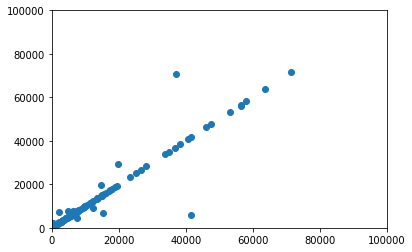

In [33]:
plt.scatter(y_model_fitted, yd)
plt.xlim(0, 100000)
plt.ylim(0, 100000)

Ok, the correlation is almost the same as above, but now we do not overestimate so much. Let's apply it to the dataset as a whole.

# Applying population estimates to the whole dataset

Let's repeat the formula for estimating population sizes

(1) <i> N = dA<sup>p</sup>  </i>,

where *N* is size of the estimated population, *d* is base coefficient for inhabitants per area, *A* is size of the area in hectares, and exponent *p* makes the hard work of modifying the density per area. To avoid confussion, here we use `dens` instead of *d* and `exp` instead of `p`

In [34]:
exp = 1.336068 ### see above
dens = 41.8398 ### see above
def get_pop_est(row):
    area = row["Area"]
    try: 
        pop_est = round(dens * (area**exp), 0)
        if math.isnan(area):
            pop_est = 1000
    except: 
        pop_est = 1000
    return pop_est
cities_pop["pop_est"] = cities_pop.apply(lambda row: get_pop_est(row), axis=1)

In [35]:
cities_pop.columns

Index(['Unnamed: 0_x', 'Primary Key', 'Ancient Toponym', 'Modern Toponym',
       'Province', 'Country', 'Barrington Atlas Rank',
       'Barrington Atlas Reference', 'Start Date', 'End Date',
       'Select Bibliography', 'Area', 'Estimate Basis', 'Civic Status',
       'Structure', 'num_of_structures', 'geometry', 'ID', 'level_0',
       'Unnamed: 0_y', 'index', 'Name', 'Area (ha)', 'Population',
       'Forum/agoraarea(m2)', 'Streetarea(m2)', 'Streetlength(m)',
       'Streetwidth(m)', 'Blockarea(m2)', 'pop_est'],
      dtype='object')

In [36]:
try:cities_pop.drop(['Name', 'Area (ha)',
       'Forum/agoraarea(m2)', 'Streetarea(m2)', 'Streetlength(m)',
      'Streetwidth(m)', 'Blockarea(m2)',], axis=1, inplace=True)
except: pass

In [37]:
cities_pop.rename({"Population":"pop_sample"}, axis=1, inplace=True)

In [38]:
def get_pop_diff(row):
    try: return abs(row["pop_sample"] / row["pop_est"])
    except: return 0
cities_pop["pop_diff"] = cities_pop.apply(lambda row: get_pop_diff(row), axis=1)
try: cities_pop.drop("Unnamed: 0_x", axis=1, inplace=True)
except: pass
cities_pop.sort_values("pop_diff", ascending=False).head(10)

,Primary Key,Ancient Toponym,Modern Toponym,Province,Country,Barrington Atlas Rank,Barrington Atlas Reference,Start Date,End Date,Select Bibliography,...,Structure,num_of_structures,geometry,ID,level_0,Unnamed: 0_y,index,pop_sample,pop_est,pop_diff
673,Hanson2016_674,Noviodunum (Germania Superior),Nyon,Germania Superior,Switzerland,4 or 5,18 D3,-49,NaN,Bedon 2001; Bedon et al 1988; BNP; Cornell and...,...,"['Basilica', 'Baths', 'Forum', 'Forum', 'Macel...",8,POINT (6.23839 46.38083),674,65.0,65.0,65.0,2290.0,458.0,5.000000
775,Hanson2016_776,Herculaneum,Ercolano,Italia (I Latium and Campania),Italy,3,44 F4,-600,79.0,Beloch 1880; Bispham 2007; de Ligt 2012; DGRG;...,...,"['Arch', 'Arch', 'Basilica', 'Baths', 'Baths',...",14,POINT (14.34714 40.80586),776,73.0,73.0,73.0,7401.0,2290.0,3.231878
1161,Hanson2016_1162,Thessalonica,Thessaloniki,Macedonia,Greece,1,50 C3,-316,NaN,Cohen 1995; McEvedy 2011; Nelis-Clément and Ro...,...,"['Acropolis', 'Agora', 'Arch', 'Arch of Galeri...",17,POINT (22.94554 40.63775),1162,112.0,112.0,112.0,70860.0,37159.0,1.906940
1047,Hanson2016_1048,Brixia,Brescia,Italia (X Venetia et Histria),Italy,2,39 G2,-89,NaN,Beloch 1880; Cornell and Mathews 1982; de Ligt...,...,"['Basilica', 'Forum', 'Sanctuary', 'Temple', ""...",8,POINT (10.21984 45.53941),1048,98.0,98.0,98.0,7790.0,4837.0,1.610502
1157,Hanson2016_1158,Pella (Macedonia),Pella,Macedonia,Greece,2,50 C3,-413,NaN,BNP; Brunt 1971; Cornell and Mathews 1982; DGR...,...,"['Acropolis', 'Agora', 'Sanctuary of Aphrodite...",8,POINT (22.52564 40.76004),1158,110.0,110.0,110.0,29368.0,19666.0,1.493339
1170,Hanson2016_1171,Cuicul,Djemila,Mauretania Caesariensis,Algeria,3,31 D4,96,NaN,BNP; DGRG; Lepelley 1979-1981; PECS; Quinn and...,...,"['Aqueduct', 'Arch', 'Arch of Caracalla', 'Bas...",19,POINT (5.73573 36.32049),1171,113.0,113.0,113.0,1157.0,788.0,1.468274
342,Hanson2016_343,Iluro,Mataró,Baetica,Spain,3,26 F5,-100,NaN,Brunt 1971; Carreras Monfort 1995-1996; Cornel...,...,"['Baths', 'Forum', 'Fountain', 'Urban grid']",4,POINT (-4.70667 36.82261),343,25.0,25.0,25.0,907.0,673.0,1.347697
1044,Hanson2016_1045,Aquileia,Aquileia,Italia (X Venetia et Histria),Italy,2,19 F4,-181,NaN,Beloch 1880; Beloch 1886; Bispham 2007; Cornel...,...,"['Amphitheatre', 'Basilica', 'Baths', 'Baths (...",18,POINT (13.36705 45.76527),1045,97.0,97.0,97.0,19667.0,14596.0,1.347424
1020,Hanson2016_1021,Placentia,Piacenza,Italia (VIII Aemilia),Italy,2,39 F3,-218,NaN,Beloch 1880; Bispham 2007; Cornell and Mathews...,...,"['Amphitheatre', 'Capitolium', 'Forum?', 'Mace...",7,POINT (9.69312 45.05239),1021,92.0,92.0,92.0,7790.0,6368.0,1.223304
1132,Hanson2016_1133,Sagalassus,Aglasun,Lycia et Pamphylia,Turkey,2,65 E2,-323,NaN,BNP; DGRG; Hanson 2011; Jones 1937; PECS; Sear...,...,"['Acropolis', 'Agora', 'Agora', 'Baths', 'Boul...",18,POINT (30.51919 37.67674),1133,107.0,107.0,107.0,2601.0,2290.0,1.135808


In [39]:
### how many city inhabitants we have
cities_pop["pop_est"].sum()

10159670.0

In [43]:
cities_pop.sort_values("pop_est").head(30)

,Primary Key,Ancient Toponym,Modern Toponym,Province,Country,Barrington Atlas Rank,Barrington Atlas Reference,Start Date,End Date,Select Bibliography,...,Structure,num_of_structures,geometry,ID,level_0,Unnamed: 0_y,index,pop_sample,pop_est,pop_diff
962,Hanson2016_963,Baccanae,Baccanae?,Italia (VII Etruria),Italy,4 or 5,42 C4,-27,NaN,DGRG.,...,"['Baths', 'Forum']",2,POINT (12.36730 42.11912),963,NaN,NaN,NaN,NaN,42.0,NaN
1210,Hanson2016_1211,Novae (Moesia Inferior),Staklen,Moesia Inferior,Bulgaria,3,22 C5,46,NaN,DGRG; PECS; Wilkes 2003b.,...,"['Baths', 'Fort', 'Walls', 'Walls']",4,POINT (25.39402 43.60722),1211,NaN,NaN,NaN,NaN,42.0,NaN
885,Hanson2016_886,Fagifulae,Montagano,Italia (IV Samnium),Italy,3,44 G2,-400,NaN,Beloch 1880; BNP; de Ligt 2012; PECS.,...,NaN,0,POINT (14.66762 41.65788),886,NaN,NaN,NaN,NaN,42.0,NaN
1107,Hanson2016_1108,Candyba,Gendevar,Lycia et Pamphylia,Turkey,4 or 5,65 C5,-323,NaN,BNP; DGRG; Jones 1937; PECS; Sear 2006.,...,"['Acropolis', 'Bouleuterion', 'Walls']",3,POINT (29.66649 36.30836),1108,NaN,NaN,NaN,NaN,106.0,NaN
1214,Hanson2016_1215,Troesmis,Drobudja,Moesia Inferior,Romania,3,22 F3,-15,NaN,BNP; PECS; Quinn and Wilson 2013; Wilkes 2003b.,...,"['Fort', ""Temple ('capitolium')"", 'Walls']",3,POINT (28.19354 45.14020),1215,NaN,NaN,NaN,NaN,106.0,NaN
763,Hanson2016_764,Circeii (1),Circeo,Italia (I Latium and Campania),Italy,3,44 D3,-600,-27.0,Beloch 1880; Bispham 2007; BNP; Cornell and Ma...,...,"['Acropolis', 'Amphitheatre?', 'Urban grid?', ...",4,POINT (13.09627 41.23563),764,NaN,NaN,NaN,NaN,106.0,NaN
583,Hanson2016_584,Beda,Bitburg,Gallia Belgica,Germany,4 or 5,11 G3,-27,NaN,BNP; Sear 2006.,...,"['Theatre', 'Walls']",2,POINT (6.52351 49.97438),584,NaN,NaN,NaN,NaN,106.0,NaN
712,Hanson2016_713,Lucentum,Tossal de Manises,Hispania Tarraconensis,Spain,3,27 E3,-201,NaN,Carreras Monfort 1995-1996; DGRG; MacMullen 20...,...,"['Baths', 'Baths', 'Forum', 'Temple', 'Temple'...",6,POINT (-0.48479 38.34602),713,NaN,NaN,NaN,NaN,106.0,NaN
1094,Hanson2016_1095,Unknown (4),Tróia,Lusitania,Portugal,4 or 5,26 B3,-50,NaN,Carreras Monfort 1995-1996.,...,"['Baths', 'Forum', 'Urban grid']",3,POINT (-8.90360 38.48882),1095,NaN,NaN,NaN,NaN,106.0,NaN
936,Hanson2016_937,Mevaniola,Unknown,Italia (VI Umbria and Ager Gallicus),Italy,3,42 B1,-400,NaN,Beloch 1880; Bispham 2007; de Ligt 2012; DGRG;...,...,"['Aqueduct', 'Basilica', 'Baths', 'Forum', 'Th...",6,POINT (11.90340 43.98312),937,NaN,NaN,NaN,NaN,106.0,NaN


In [45]:
def normalize_pop_est(pop_est):
    """if smaller than 1000, make 1000"""
    if pop_est < 1000:
        pop_est = 1000
    return pop_est
cities_pop["pop_est"] = cities_pop["pop_est"].apply(normalize_pop_est)

In [46]:
cities_pop["pop_est"].sum()

10214337.0

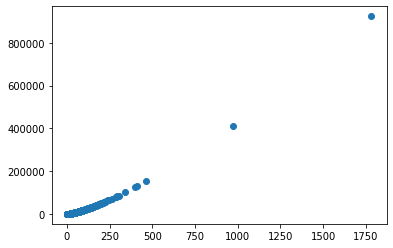

In [47]:
plt.scatter(cities_pop["Area"], cities_pop["pop_est"])

In [48]:
cities_pop.to_csv("../data/roman_cities_pop.csv")

In [49]:
cities_pop.to_file("../data/roman_cities_pop.geojson", driver="GeoJSON")

# Western cities

In [4]:
cities_pop = gpd.read_file("../data/roman_cities_pop.geojson")

In [3]:
print(cities_pop["Province"].unique())

['Achaea' 'Aegyptus' 'Africa Proconsularis' 'Alpes Cottiae'
 'Alpes Graiae et Poeninae' 'Alpes Maritimae' 'Arabia' 'Asia' 'Baetica'
 'Bithynia et Pontus' 'Britannia' 'Cappadocia et Galatia'
 'Cilicia et Cyprus' 'Corsica et Sardinia' 'Creta et Cyrenaica' 'Dacia'
 'Dalmatia' 'Gallia Aquitania' 'Gallia Belgica' 'Gallia Lugdunensis'
 'Gallia Narbonensis' 'Germania Inferior' 'Germania Superior'
 'Hispania Tarraconensis' 'Italia (I Latium and Campania)'
 'Italia (II Apulia et Calabria)' 'Italia (III Lucania et Brutii)'
 'Italia (IV Samnium)' 'Italia (V Picenum)'
 'Italia (VI Umbria and Ager Gallicus)' 'Italia (VII Etruria)'
 'Italia (VIII Aemilia)' 'Italia (IX Liguria)'
 'Italia (X Venetia et Histria)' 'Italia (XI Transpadana)' 'Lusitania'
 'Lycia et Pamphylia' 'Macedonia' 'Mauretania Caesariensis'
 'Mauretania Tingitana' 'Moesia Inferior' 'Moesia Superior' 'Noricum'
 'Numidia' 'Pannonia Inferior' 'Pannonia Superior' 'Raetia' 'Silicia'
 'Syria' 'Syria Palestina' 'Thracia']


In [5]:
# there is a missplell: "Silicia" instead of "Sicilia", let's correct it
def correct_sicilia(province_value):
    if province_value == "Silicia":
        province_value = "Sicilia"
    return province_value
cities_pop["Province"] = cities_pop["Province"].apply(correct_sicilia)

In [6]:
print(cities_pop["Province"].unique())

['Achaea' 'Aegyptus' 'Africa Proconsularis' 'Alpes Cottiae'
 'Alpes Graiae et Poeninae' 'Alpes Maritimae' 'Arabia' 'Asia' 'Baetica'
 'Bithynia et Pontus' 'Britannia' 'Cappadocia et Galatia'
 'Cilicia et Cyprus' 'Corsica et Sardinia' 'Creta et Cyrenaica' 'Dacia'
 'Dalmatia' 'Gallia Aquitania' 'Gallia Belgica' 'Gallia Lugdunensis'
 'Gallia Narbonensis' 'Germania Inferior' 'Germania Superior'
 'Hispania Tarraconensis' 'Italia (I Latium and Campania)'
 'Italia (II Apulia et Calabria)' 'Italia (III Lucania et Brutii)'
 'Italia (IV Samnium)' 'Italia (V Picenum)'
 'Italia (VI Umbria and Ager Gallicus)' 'Italia (VII Etruria)'
 'Italia (VIII Aemilia)' 'Italia (IX Liguria)'
 'Italia (X Venetia et Histria)' 'Italia (XI Transpadana)' 'Lusitania'
 'Lycia et Pamphylia' 'Macedonia' 'Mauretania Caesariensis'
 'Mauretania Tingitana' 'Moesia Inferior' 'Moesia Superior' 'Noricum'
 'Numidia' 'Pannonia Inferior' 'Pannonia Superior' 'Raetia' 'Sicilia'
 'Syria' 'Syria Palestina' 'Thracia']


In [40]:
# based on Hanson, J. W. ‘Cities, Information, and the Epigraphic Habit: Re-Evaluating the Links between the Numbers of Inscriptions and the Sizes of Sites’. Journal of Urban Archaeology 4 (2021): 137–52.

hanson_west_provinces_str = "Africa Proconsularis, Alpes Cottiae, Alpes Graiae et Poeninae, Alpes Maritimae, Baetica, Britannia, Corsica et Sardinia, Dalmatia, Gallia Aquitania, Gallia Belgica, Gallia Lugdunensis, Gallia Narbonensis, Germania Inferior, Germania Superior, Hispania Tarraconensis, Lusitania, Mauretania Caesariensis, Mauretania Tingitana, Noricum, Numidia, Pannonia Inferior, Pannonia Superior, Raetia, Sicilia"
hanson_west_provinces_list = hanson_west_provinces_str.split(", ")
hanson_west_provinces_list

['Africa Proconsularis',
 'Alpes Cottiae',
 'Alpes Graiae et Poeninae',
 'Alpes Maritimae',
 'Baetica',
 'Britannia',
 'Corsica et Sardinia',
 'Dalmatia',
 'Gallia Aquitania',
 'Gallia Belgica',
 'Gallia Lugdunensis',
 'Gallia Narbonensis',
 'Germania Inferior',
 'Germania Superior',
 'Hispania Tarraconensis',
 'Lusitania',
 'Mauretania Caesariensis',
 'Mauretania Tingitana',
 'Noricum',
 'Numidia',
 'Pannonia Inferior',
 'Pannonia Superior',
 'Raetia',
 'Sicilia']

In [41]:
hanson_provinces_italy_str = "I Latium and Campania, II Apulia et Calabria, III Lucania et Brutii, IV Samnium, V Picenum, VI Umbria and Ager Gallicus, VII Etruria, VIII Aemilia, IX Liguria, X Venetia et Histria, XI Transpadana"
hanson_provinces_italy_list = ["Italia (" + prov + ")" for prov in hanson_provinces_italy_str.split(", ")]
hanson_provinces_italy_list

['Italia (I Latium and Campania)',
 'Italia (II Apulia et Calabria)',
 'Italia (III Lucania et Brutii)',
 'Italia (IV Samnium)',
 'Italia (V Picenum)',
 'Italia (VI Umbria and Ager Gallicus)',
 'Italia (VII Etruria)',
 'Italia (VIII Aemilia)',
 'Italia (IX Liguria)',
 'Italia (X Venetia et Histria)',
 'Italia (XI Transpadana)']

In [42]:
hanson_west_provinces = hanson_west_provinces_list + hanson_provinces_italy_list
len(hanson_west_provinces)

35

In [43]:
# do we match what we have in our cities data?
[prov for prov in hanson_west_provinces if prov not in cities_pop["Province"].unique()]

[]

In [12]:
def is_western(province_val):
    if province_val in hanson_west_provinces:
        return True
    else:
        return False
cities_pop["western_province"] = cities_pop["Province"].apply(is_western)

In [13]:
cities_pop["western_province"].sum()

889

In [14]:
cities_pop[cities_pop["western_province"]]["pop_est"].sum()

5327544.0

In [28]:
cities_pop.to_file("../data/roman_cities_pop.geojson", driver="GeoJSON")

In [21]:
import sddk
s = sddk.cloudSession("sciencedata.dk", "SDAM_root", "648597@au.dk")

connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


In [22]:
s.write_file("SDAM_data/urban/roman_cities.json", pd.DataFrame(cities_pop.drop("geometry", axis=1)))

A file with the same name ("roman_cities.json") already exists in this location.
Your <class 'pandas.core.frame.DataFrame'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/urban/roman_cities.json"


In [23]:
s.write_file("SDAM_data/urban/roman_cities.geojson", cities_pop)

A file with the same name ("roman_cities.geojson") already exists in this location.
Your <class 'geopandas.geodataframe.GeoDataFrame'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/urban/roman_cities.geojson"


# Plot cities with population sizes

In [50]:
### # pelagios provinces
url = "https://raw.githubusercontent.com/pelagios/magis-pleiades-regions/main/pleiades-regions-magis-pelagios.geojson"
pleiades_regions = gpd.read_file(url)
pleiades_regions.head(5)

,name,uri,geometry
0,Lusitania,http://pleiades.stoa.org/places/1101,"POLYGON ((-7.31057 37.19663, -7.32457 37.19556..."
1,Byzacena,http://pleiades.stoa.org/places/991345,"MULTIPOLYGON (((11.01815 34.62424, 11.00879 34..."
2,Viennensis,http://pleiades.stoa.org/places/992074,"POLYGON ((4.62344 45.60642, 4.71224 45.60876, ..."
3,Lycia et Pamphylia,http://pleiades.stoa.org/places/981530,"MULTIPOLYGON (((29.62331 36.07470, 29.61295 36..."
4,Savia,http://pleiades.stoa.org/places/991357,"POLYGON ((18.10598 45.77203, 18.10654 45.71079..."


In [51]:
#save for future usage
# pleiades_regions.to_file('../data/pleiades_regions.geojson', driver='GeoJSON') 

In [3]:
# uncomment to read back locally saved file:
pleiades_regions = gpd.read_file('../data/pleiades_regions.geojson', driver='GeoJSON')

(23.0, 55.5)

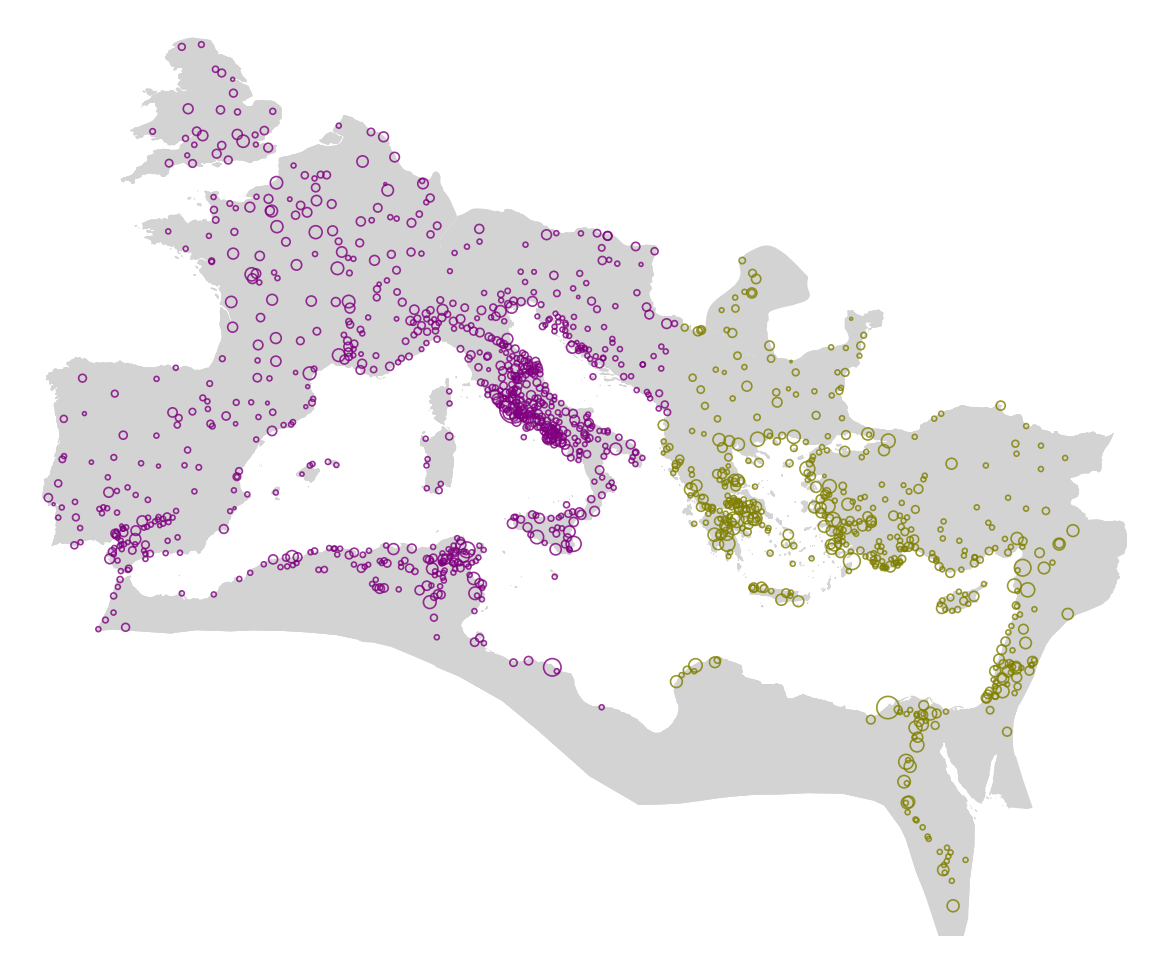

In [56]:
fig, ax = plt.subplots()
pleiades_regions.plot(ax=ax, color="lightgray")
colors = ["purple" if val==True else "olive" for val in cities_pop["western_province"]]
markersizes = np.sqrt(np.array(cities_pop["pop_est"].tolist()) / 500)
cities_pop.plot(ax=ax, edgecolors=colors, linewidth=0.4, facecolors="none", markersize=markersizes, alpha=0.8)
ax.set_axis_off()
ax.set_xlim(-10, 41)
ax.set_ylim(23, 55.5)

In [ ]:
save_figure(fig, "roman_cities_west_x_east")

In [55]:
pleiades_west_unfiltered = pleiades_regions[pleiades_regions.geometry.apply(lambda x: cities_pop[cities_pop["western_province"]].within(x).any())]
pleiades_regions_west = pleiades_west_unfiltered_gdf[~pleiades_west_unfiltered_gdf["name"].isin(["Moesiae", "Praevalitana"])]

(23.0, 55.5)

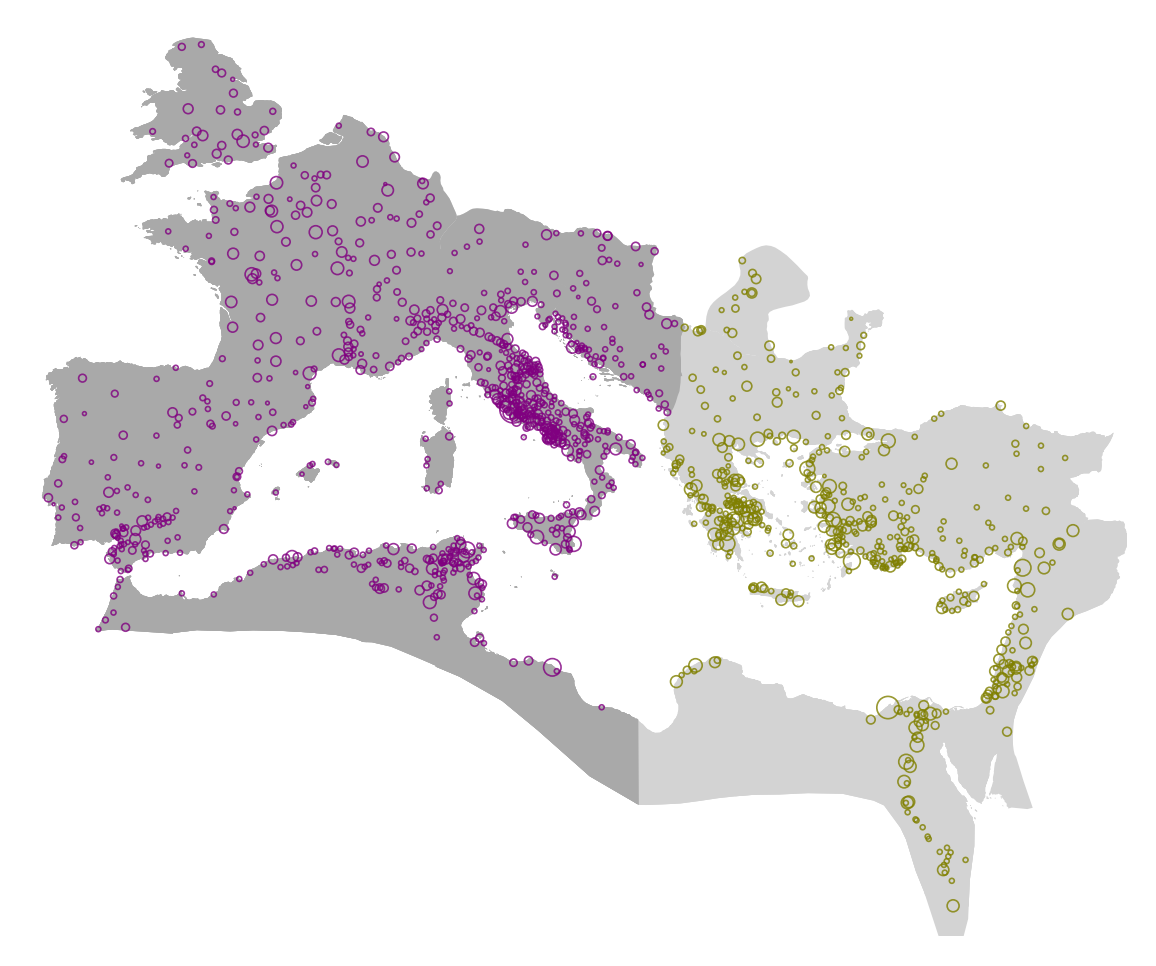

In [57]:
fig,ax=plt.subplots()
pleiades_regions.plot(ax=ax, color="lightgrey")
pleiades_regions_west.plot(ax=ax, color="darkgrey")

colors = ["purple" if val==True else "olive" for val in cities_pop["western_province"]]
markersizes = np.sqrt(np.array(cities_pop["pop_est"].tolist()) / 500)
cities_pop.plot(ax=ax, edgecolors=colors, linewidth=0.4, facecolors="none", markersize=markersizes, alpha=0.8)
ax.set_axis_off()
ax.set_xlim(-10, 41)
ax.set_ylim(23, 55.5)

In [58]:
pleiades_regions_west.to_file("../data/pleiades_regions_west.geojson", driver="GeoJSON")